In [4]:
from preprocessing import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nwoodle/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
dataset = data_preprocessing(threshold=2)

In [3]:
dataset

,total_pop2017,white_pop2017,afram_pop2017,hisp_pop2017,avg_agi,neg,neu,com,pos,service_name_--Select Answer--,...,case_origin_Mobile,case_origin_Phone,case_origin_Referral Notice,case_origin_Route Slip,case_origin_Self-Generated,case_origin_Station 38 Incident Reports,case_origin_Walk-In,case_origin_Water Utilties Work Order (WAO),case_origin_Web,logis_label
5,84025,62630,2972,62511,43025.30,0.000,0.000,0.0000,0.00,0,...,1,0,0,0,0,0,0,0,0,0
7,84025,62630,2972,62511,43025.30,0.000,0.000,0.0000,0.00,0,...,1,0,0,0,0,0,0,0,0,0
9,84025,62630,2972,62511,43025.30,0.000,1.000,0.0000,0.00,0,...,0,0,0,0,0,0,0,0,1,1
16,84025,62630,2972,62511,43025.30,0.000,1.000,0.0000,0.00,0,...,1,0,0,0,0,0,0,0,0,1
21,84025,62630,2972,62511,43025.30,0.000,1.000,0.0000,0.00,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181849,31728,26860,156,30002,31187.79,0.000,1.000,0.0000,0.00,0,...,1,0,0,0,0,0,0,0,0,1
181850,31728,26860,156,30002,31187.79,0.000,0.000,0.0000,0.00,0,...,1,0,0,0,0,0,0,0,0,1
181851,31728,26860,156,30002,31187.79,0.086,0.844,-0.2732,0.07,0,...,0,0,0,0,0,0,0,0,1,1
181853,31728,26860,156,30002,31187.79,0.000,0.000,0.0000,0.00,0,...,1,0,0,0,0,0,0,0,0,1


In [35]:
dataset["avg_agi"].replace('', np.nan, inplace=True)
dataset.dropna(subset=["avg_agi"], inplace=True)

In [5]:
train, test, valid = train_test_validation(dataset)

In [6]:
from sklearn import linear_model

In [7]:
model = linear_model.LogisticRegression(C = 0.005, class_weight='balanced')

In [8]:
train_data, train_label = data_label(train)

In [9]:
valid_data, valid_label = data_label(valid)
test_data, test_label = data_label(test)

In [10]:
model.fit(train_data, train_label)

/Users/nwoodle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nwoodle/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.005, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
model.score(valid_data, valid_label)

0.7382228265216348

In [12]:
model.score(test_data, test_label)

0.7283634618461047

In [13]:
model.score(train_data, train_label)

0.7359501694678011

In [14]:
import xgboost as xgb

In [15]:
D_train = xgb.DMatrix(train_data, label=train_label)
D_valid = xgb.DMatrix(valid_data, label=valid_label)

In [16]:
param = {
    # 'eta': 0.3, 
    # 'max_depth': 3,  
    # 'objective': 'multi:softprob',  
    # 'num_class': 2,
    'objective': 'binary:logistic',
    'tree_method': 'hist',
    'eval_metrix': 'auc',
    'eta': 0.3,
    'gamma': 0,
    'min_child_weight': 0.01,
    'max_depth': 6,
    'max_delta_step': 1,
    'subsample': 0.85,
    'colsample_bytree': 0.45,
    'colsample_bylevel': 0.7,
    'colsample_bynode': 1.0,
    'lambda': 5,
    'alpha': 0.2
    } 

steps = 100  # The number of training iterations

In [26]:
model = xgb.train(param, D_train, steps)

In [27]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_valid)
best_preds = np.asarray([1 if p >= 0.5 else 0 for p in preds])

print("Precision = {}".format(precision_score(valid_label, best_preds, average='macro')))
print("Recall = {}".format(recall_score(valid_label, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(valid_label, best_preds)))

Precision = 0.792713511067106
Recall = 0.7237184205880598
Accuracy = 0.7505398704310965


In [44]:
# Roc Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(valid_label, best_preds)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',\
lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Precision = 0.8035869661104176
Recall = 0.7313209185344554
Accuracy = 0.7587258420900029


In [28]:
# Shap feature imporatnce analysis
import shap
shap.initjs()

In [29]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_data)

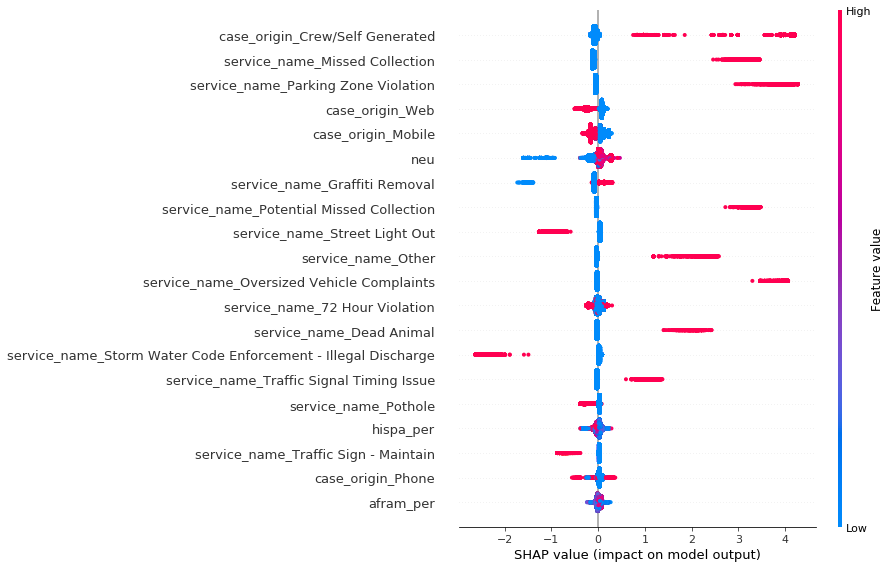

In [31]:
shap.summary_plot(shap_values, train_data)

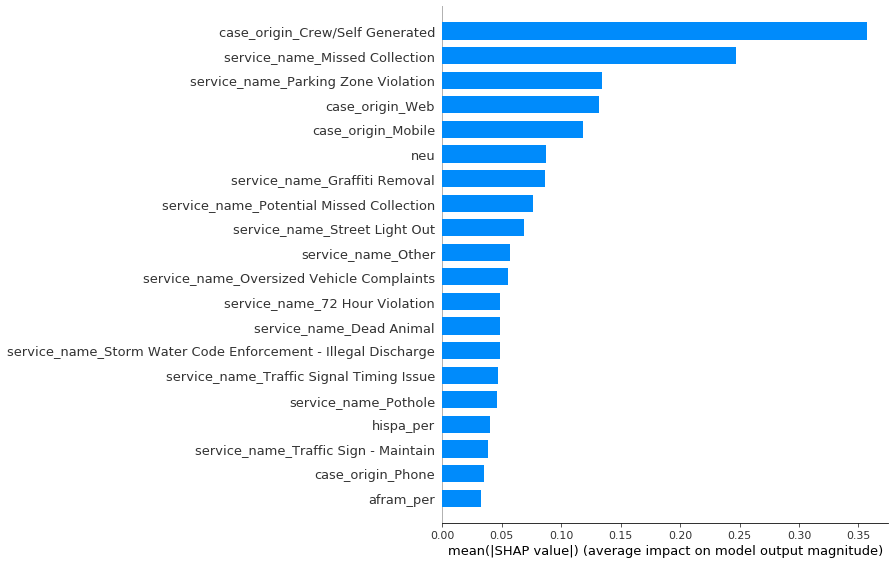

In [33]:
shap.summary_plot(shap_values, train_data, plot_type="bar")